## Postwork 4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### DESARROLLO

En este Postwork vamos a hacer análisis bivariado de nuestras variables numéricas. Si tu dataset sólo tiene variables categóricas o datos no estructurados (texto libre), entonces puedes pedirle a tu experta que te comparta algún dataset con el que puedas realizar estos ejercicios.

Utilizando tu dataset, realiza las siguientes actividades:

1. Identifica cuáles son las variables numéricas en tu dataset.
2. Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
3. Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
4. Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
5. Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
6. Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/LIZZETHGOMEZ/Data-Science-Fase-3-BEDU-Santander/main/Data/cleanData.csv", index_col = 0)
df.head()

,country,year,respiratory_infections_and_tuberculosis_number,respiratory_infections_and_tuberculosis_percent,respiratory_infections_and_tuberculosis_rate,chronic_respiratory_diseases_number,chronic_respiratory_diseases_percent,chronic_respiratory_diseases_rate,all_greenhouse_gas,CO2,CH4,N2O,Fgas,mean_annual_temp,total_respiratory_diseases,total_diseases_percent
0,Mexico,1990,39290,0.08916,45.96035,16909,0.03839,19.78044,417.45,290.01,88.10,37.47,1.87,20.958333,56199,0.12755
1,Canada,1990,6797,0.03571,24.93967,9319,0.04895,34.19049,626.36,483.99,87.75,42.92,11.70,-7.450000,16116,0.08466
2,Israel,1990,772,0.02651,15.56473,1327,0.04556,26.75464,43.95,33.78,8.35,1.62,0.21,19.816667,2099,0.07207
3,Japan,1990,68816,0.08483,54.67434,29862,0.03681,23.72535,1109.37,1016.89,37.86,28.33,26.30,11.658333,98678,0.12164
4,Mexico,1991,37046,0.08447,42.53984,17171,0.03917,19.71738,435.45,308.41,88.71,36.36,1.97,20.891667,54217,0.12364


In [6]:
#1 Identifica cuáles son las variables numéricas en tu dataset.
cols = df.dtypes
cols[(cols=='float64') | (cols=='int64')]

year                                                 int64
respiratory_infections_and_tuberculosis_number       int64
respiratory_infections_and_tuberculosis_percent    float64
respiratory_infections_and_tuberculosis_rate       float64
chronic_respiratory_diseases_number                  int64
chronic_respiratory_diseases_percent               float64
chronic_respiratory_diseases_rate                  float64
all_greenhouse_gas                                 float64
CO2                                                float64
CH4                                                float64
N2O                                                float64
Fgas                                               float64
mean_annual_temp                                   float64
total_respiratory_diseases                           int64
total_diseases_percent                             float64
dtype: object

In [5]:
df.dtypes

country                                             object
year                                                 int64
respiratory_infections_and_tuberculosis_number       int64
respiratory_infections_and_tuberculosis_percent    float64
respiratory_infections_and_tuberculosis_rate       float64
chronic_respiratory_diseases_number                  int64
chronic_respiratory_diseases_percent               float64
chronic_respiratory_diseases_rate                  float64
all_greenhouse_gas                                 float64
CO2                                                float64
CH4                                                float64
N2O                                                float64
Fgas                                               float64
mean_annual_temp                                   float64
total_respiratory_diseases                           int64
total_diseases_percent                             float64
dtype: object

In [17]:
#Conviertiendo la columna 'country' a tipo categórica
#df['country'] = df['country'].astype('category')

#Eliminando columna 'country'
df = df.drop(columns='country')
df.head()
df.shape()

KeyError: "['country'] not found in axis"

In [15]:
#2 Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
df.isna().sum()

year                                               0
respiratory_infections_and_tuberculosis_number     0
respiratory_infections_and_tuberculosis_percent    0
respiratory_infections_and_tuberculosis_rate       0
chronic_respiratory_diseases_number                0
chronic_respiratory_diseases_percent               0
chronic_respiratory_diseases_rate                  0
all_greenhouse_gas                                 0
CO2                                                0
CH4                                                0
N2O                                                0
Fgas                                               0
mean_annual_temp                                   0
total_respiratory_diseases                         0
total_diseases_percent                             0
dtype: int64

In [9]:
#Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
df.corr()

,year,respiratory_infections_and_tuberculosis_number,respiratory_infections_and_tuberculosis_percent,respiratory_infections_and_tuberculosis_rate,chronic_respiratory_diseases_number,chronic_respiratory_diseases_percent,chronic_respiratory_diseases_rate,all_greenhouse_gas,CO2,CH4,N2O,Fgas,mean_annual_temp,total_respiratory_diseases,total_diseases_percent
year,1.000000,0.008074,-0.131400,-0.139515,0.088457,0.176544,0.097659,-0.002029,0.007665,-0.061480,-0.073810,0.159470,0.047136,0.044359,0.017183
respiratory_infections_and_tuberculosis_number,0.008074,1.000000,0.560206,0.539982,0.773621,0.037689,0.027233,0.757036,0.796699,0.304623,0.339676,0.842089,0.149408,0.959356,0.398407
respiratory_infections_and_tuberculosis_percent,-0.131400,0.560206,1.000000,0.870035,0.266196,0.241703,0.113943,0.209726,0.238943,-0.007766,-0.011316,0.344958,-0.018278,0.462977,0.815272
respiratory_infections_and_tuberculosis_rate,-0.139515,0.539982,0.870035,1.000000,0.260588,0.136261,0.283733,0.171872,0.215440,-0.105598,-0.097317,0.336553,-0.123376,0.448046,0.665136
chronic_respiratory_diseases_number,0.088457,0.773621,0.266196,0.260588,1.000000,0.285242,0.267497,0.826944,0.824136,0.568804,0.576748,0.781837,0.225758,0.920993,0.348850
chronic_respiratory_diseases_percent,0.176544,0.037689,0.241703,0.136261,0.285242,1.000000,0.799272,0.138941,0.103072,0.261806,0.246522,0.126266,0.164303,0.150206,0.758963
chronic_respiratory_diseases_rate,0.097659,0.027233,0.113943,0.283733,0.267497,0.799272,1.000000,0.072006,0.064374,0.080349,0.083116,0.083303,0.037107,0.135875,0.553443
all_greenhouse_gas,-0.002029,0.757036,0.209726,0.171872,0.826944,0.138941,0.072006,1.000000,0.990066,0.730992,0.749569,0.814105,0.121132,0.833724,0.223648
CO2,0.007665,0.796699,0.238943,0.215440,0.824136,0.103072,0.064374,0.990066,1.000000,0.629457,0.654810,0.826276,0.071815,0.856860,0.221849
CH4,-0.061480,0.304623,-0.007766,-0.105598,0.568804,0.261806,0.080349,0.730992,0.629457,1.000000,0.946325,0.459647,0.301297,0.440608,0.151028


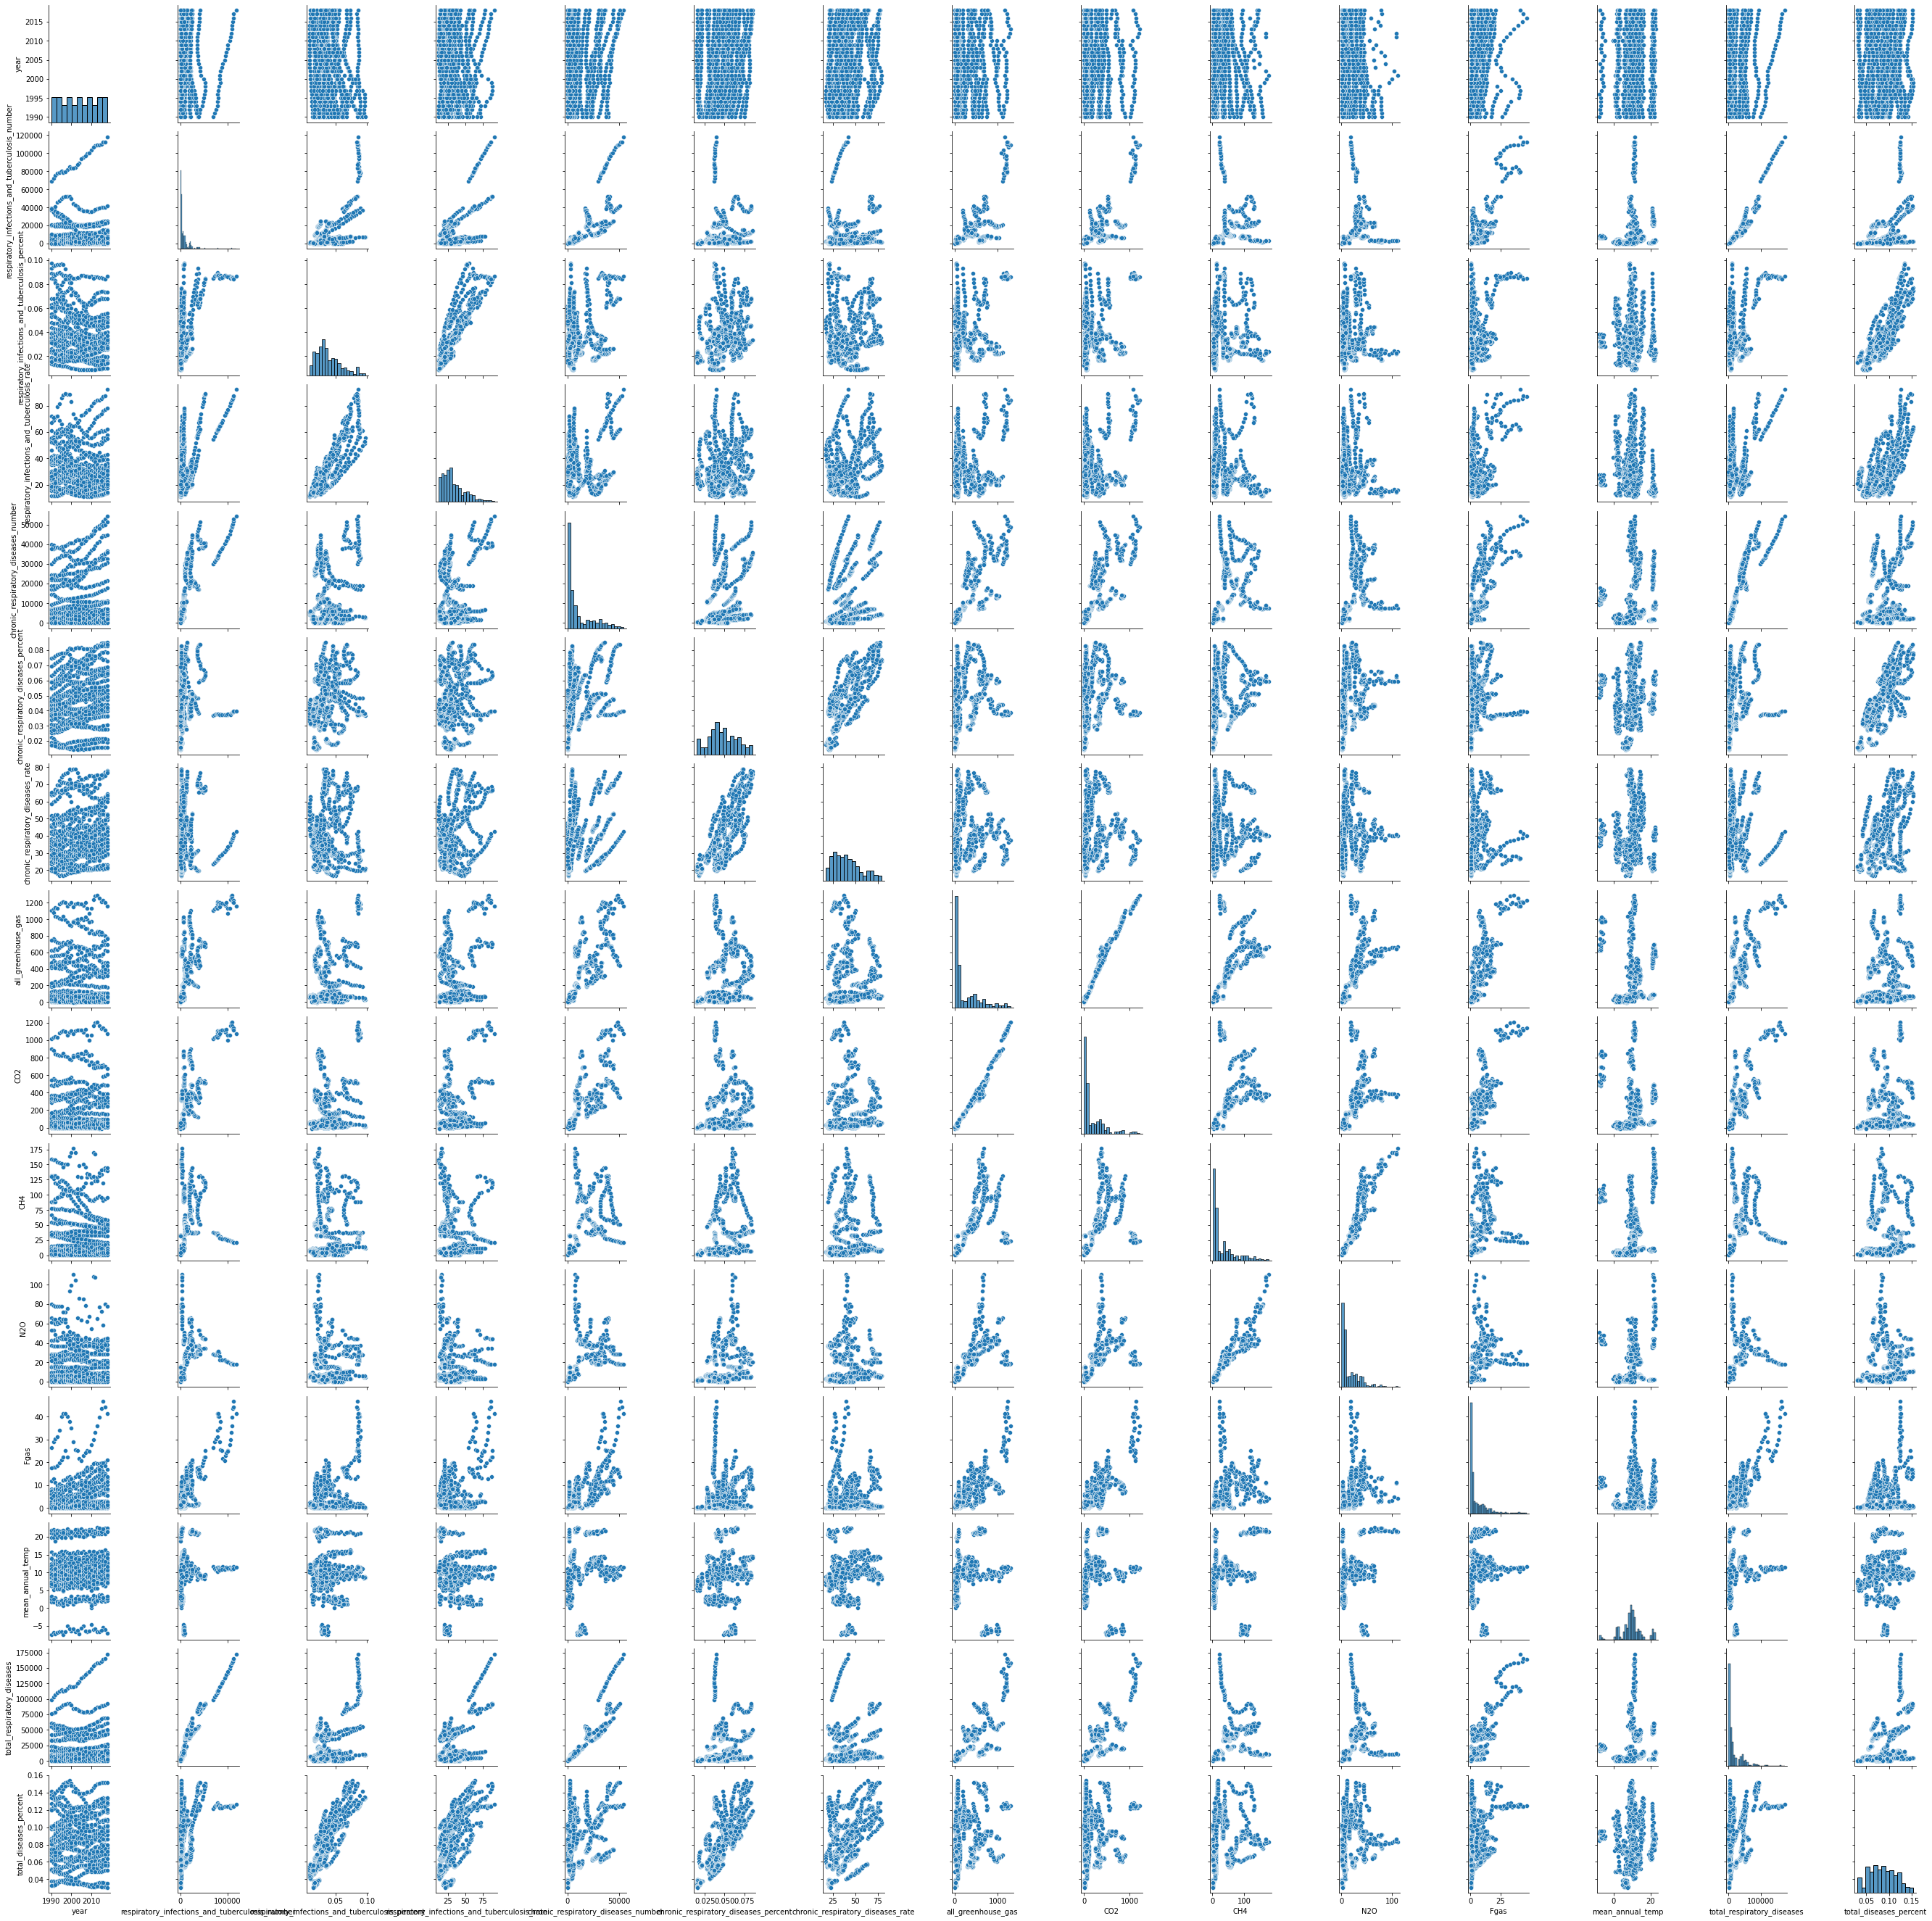

In [16]:
sns.pairplot(df)

<AxesSubplot:>

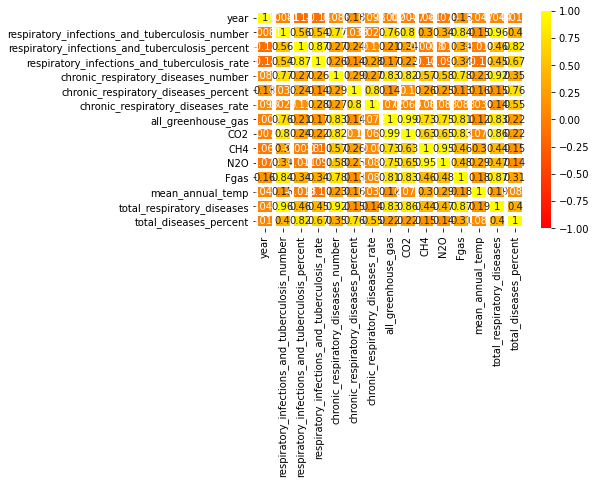

In [10]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='autumn',linewidth=4,annot=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>